In [ ]:
!pip install langchain_community

In [ ]:
!pip install replicate

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata


# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token


# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(model=model,replicate_api_token=api_token,)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Akses file Anda
df = pd.read_csv('/content/drive/MyDrive/personality_datasert.csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


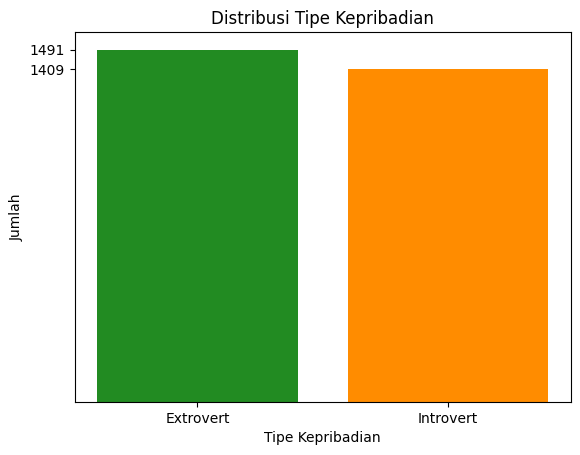

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['Personality'].value_counts()

plt.bar(counts.index, counts.values,color=['forestgreen', 'darkorange'])
plt.title('Distribusi Tipe Kepribadian')
plt.xlabel('Tipe Kepribadian')
plt.ylabel('Jumlah')
plt.yticks(counts.values)
plt.show()



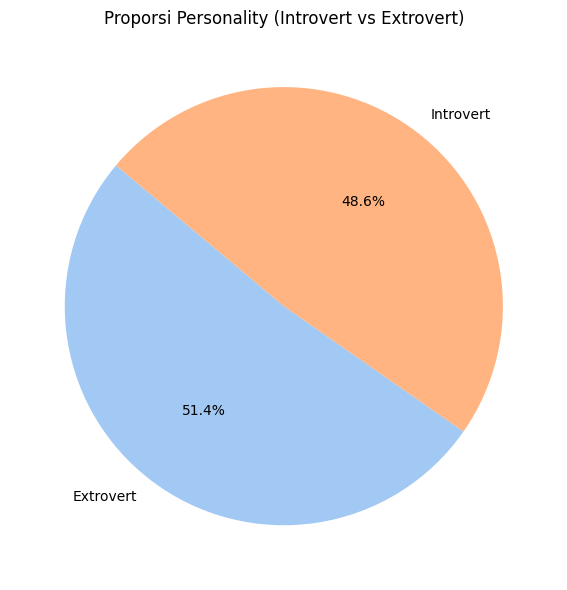

In [ ]:
#Pie chart distribusi Personality
personality_counts = df['Personality'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(personality_counts, labels=personality_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'), startangle=140)
plt.title('Proporsi Personality (Introvert vs Extrovert)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3469427847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set3')
/tmp/ipython-input-3469427847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set3')
/tmp/ipython-input-3469427847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y=col, palette='Set3')
/tmp/ipython-input-3469427847.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

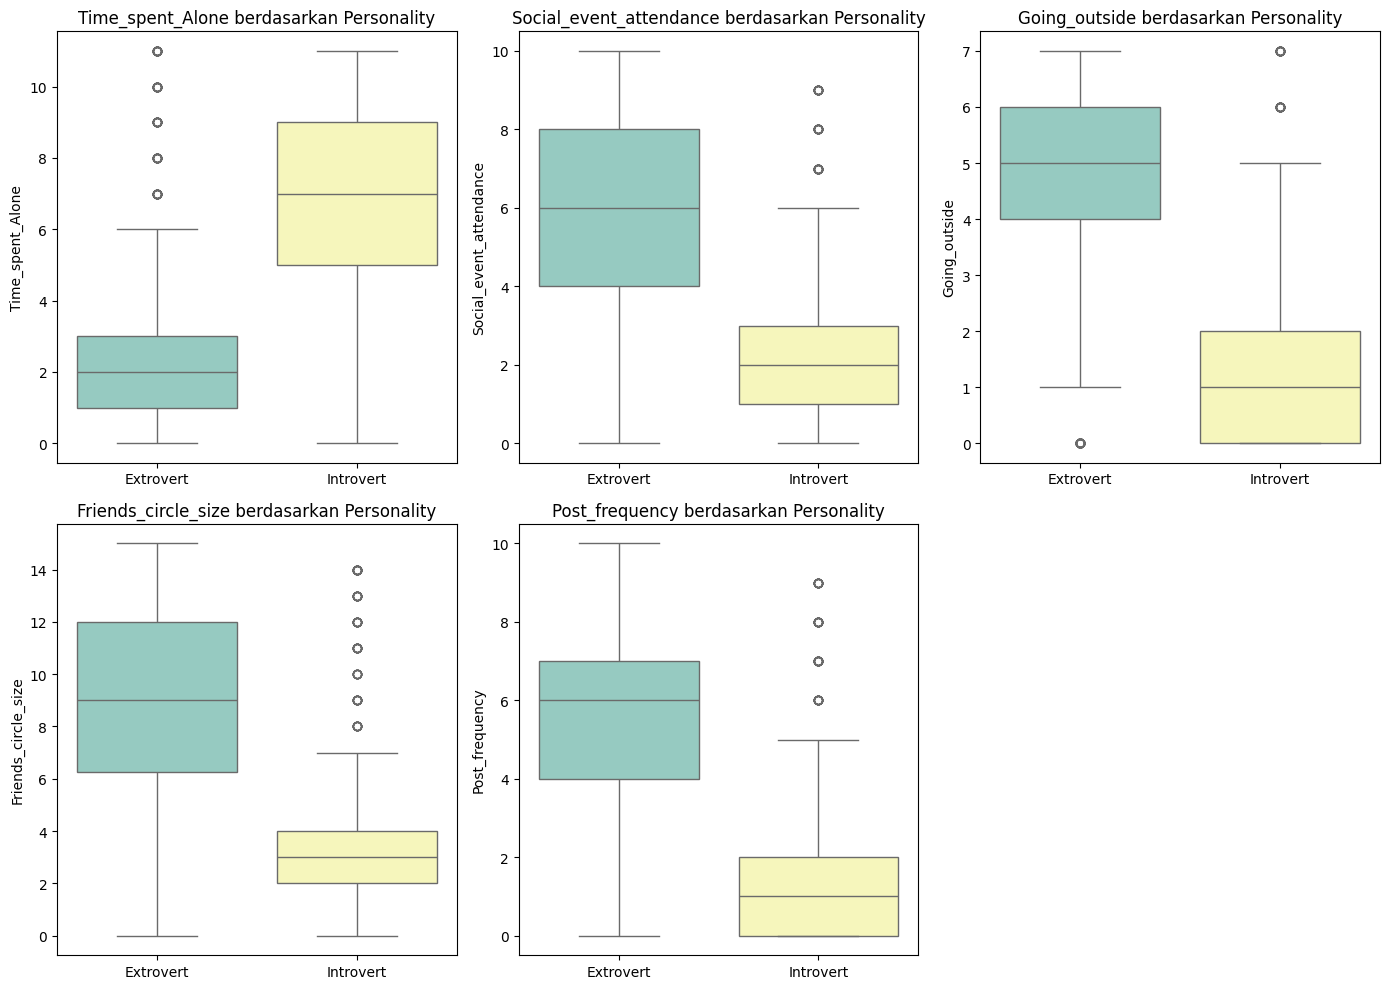

In [ ]:
#Boxplot fitur numerik berdasarkan Personality
numerical_cols = [
    "Time_spent_Alone",
    "Social_event_attendance",
    "Going_outside",
    "Friends_circle_size",
    "Post_frequency"
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Personality', y=col, palette='Set3')
    plt.title(f'{col} berdasarkan Personality')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


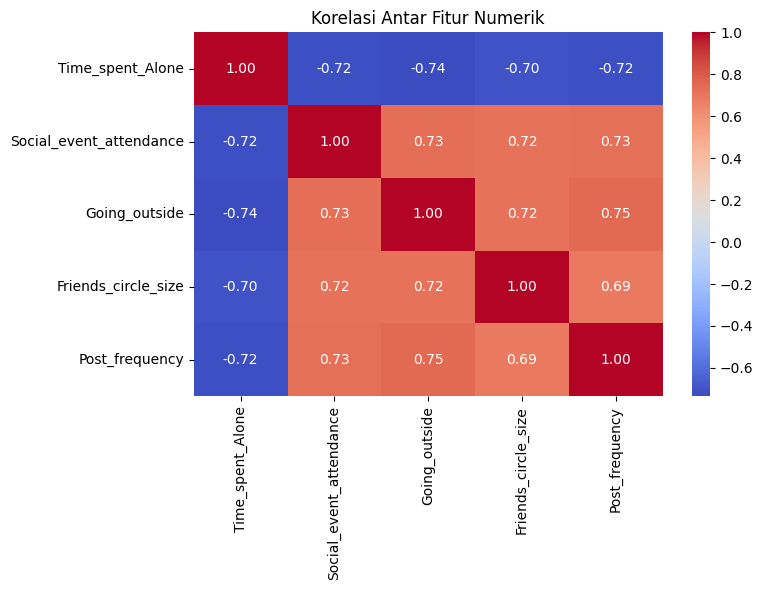

In [ ]:
#Heatmap korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from tqdm import tqdm
import replicate


# Fungsi untuk buat prompt dari data baris
def build_personality_prompt(row):
    return (
        f"Saya menghabiskan {row['time_spent_alone']} jam sendirian dalam sehari, "
        f"menghadiri {row['social_event_attendance']} acara sosial per minggu, "
        f"memiliki {row['friends_circle_size']} teman dekat, membuat {row['post_frequency']} posting media sosial per minggu, "
        f"keluar rumah sebanyak {row['going_outside']} kali per minggu, "
        f"{'saya takut berbicara di depan umum' if row['stage_fear'].lower() == 'yes' else 'saya tidak takut berbicara di depan umum'}, "
        f"dan {'merasa lelah' if row['drained_after_socializing'].lower() == 'yes' else 'tidak merasa lelah'} setelah bersosialisasi. "
        f"Berdasarkan informasi ini, apakah saya seorang introvert atau extrovert? Jawab dengan singkat dan jelas."
    )

# Contoh data pengguna (list of dicts) – bisa diganti baca dari CSV

# dataset
data = [
    # Potensi data Introvert
    {
        "time_spent_alone": 11,
        "friends_circle_size": 2,
        "post_frequency": 1,
        "social_event_attendance": 2,
        "going_outside": 1,
        "stage_fear": "yes",
        "drained_after_socializing": "yes"
    },
    {
        "time_spent_alone": 0,
        "friends_circle_size": 12,
        "post_frequency": 6,
        "social_event_attendance": 5,
        "going_outside": 4,
        "stage_fear": "no",
        "drained_after_socializing": "no"
    },
    {
        "time_spent_alone": 7,
        "friends_circle_size": 5,
        "post_frequency": 0,
        "social_event_attendance": 2,
        "going_outside": 0,
        "stage_fear": "yes",
        "drained_after_socializing": "yes"
    },

    # Potensi data Ekstrovert
    {
        "time_spent_alone": 2,
        "friends_circle_size": 7,
        "post_frequency": 3,
        "social_event_attendance": 8,
        "going_outside": 5,
        "stage_fear": "no",
        "drained_after_socializing": "no"
    },
    {
        "time_spent_alone": 5,
        "friends_circle_size": 1,
        "post_frequency": 2,
        "social_event_attendance": 0,
        "going_outside": 0,
        "stage_fear": "yes",
        "drained_after_socializing": "yes"
    },
    {
        "time_spent_alone": 11,
        "friends_circle_size": 4,
        "post_frequency": 1,
        "social_event_attendance": 1,
        "going_outside": 0,
        "stage_fear": "yes",
        "drained_after_socializing": "yes"
    }
]



# Looping dan kirim ke Granite
results = []

for user in tqdm(data, desc="🔮 Memprediksi dengan Granite"):
    prompt = build_personality_prompt(user)
    try:
        output = replicate.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={
                "prompt": prompt,
                "temperature": 0.2,
                "top_k": 40,
                "top_p": 0.9,
                "max_new_tokens": 100,
                "repetition_penalty": 1.1
            }
        )
        result_text = "".join(output).strip()
        if "introvert" in result_text.lower():
            label = "Introvert"
        elif "extrovert" in result_text.lower():
            label = "Extrovert"
        else:
            label = "Tidak terdeteksi"

    except Exception as e:
        result_text = str(e)
        label = "Error"

    results.append({
        **user,
        "Prompt": prompt,
        "Output": result_text,
        "Prediksi": label
    })

# Tampilkan sebagai DataFrame
df_results = pd.DataFrame(results)
pd.set_option("display.max_colwidth", None)
display(df_results[["Prompt", "Output", "Prediksi"]])

🔮 Memprediksi dengan Granite: 100%|██████████| 6/6 [00:19<00:00,  3.18s/it]


,Prompt,Output,Prediksi
0,"Saya menghabiskan 11 jam sendirian dalam sehari, menghadiri 2 acara sosial per minggu, memiliki 2 teman dekat, membuat 1 posting media sosial per minggu, keluar rumah sebanyak 1 kali per minggu, saya takut berbicara di depan umum, dan merasa lelah setelah bersosialisasi. Berdasarkan informasi ini, apakah saya seorang introvert atau extrovert? Jawab dengan singkat dan jelas.","Berdasarkan informasi yang diberikan, Anda dapat dikenakan sebagai seorang introvert. Ini karena Anda:\n\n1. Menghabiskan waktu sendirian sebanyak 11 jam sehari.\n2. Hanya menghadiri 2 acara sosial per minggu.\n3. Mengatakan bahwa Anda memiliki 2 teman dekat, yang mungkin tidak membutuhkan interaksi sosial yang sering.\n4. Membuat 1 posting media sosial per minggu, yang mungkin menunjukkan keinginan untuk berinteraksi dengan dunia luar dengan kebijaksanaan.\n5. Keluar rumah hanya sekali per minggu, yang menunjukkan preferensi untuk waktu sendirian.\n6. Takut berbicara di depan umum, yang merupakan sifat yang umum di antara orang-orang introvert.\n7. Merasakan lelah setelah bersosialisasi, yang menunjukkan bahwa interaksi sosial memerlukan tenaga Anda.\n\nSifat-sifat ini, secara keseluruhan, lebih sesuai dengan profil introvert, yang biasanya merangkum energi dari interaksi sosial dan membutuhkan waktu sendirian untuk rejuvenasi. Namun, ingat bahwa kedua profil sosial (introvert vs. extrovert) tidak berarti ""selalu"" atau ""tidak pernah"". Mereka berada pada skala, dan individu dapat berada di berbagai titik di antara kedua profil.",Introvert
1,"Saya menghabiskan 0 jam sendirian dalam sehari, menghadiri 5 acara sosial per minggu, memiliki 12 teman dekat, membuat 6 posting media sosial per minggu, keluar rumah sebanyak 4 kali per minggu, saya tidak takut berbicara di depan umum, dan tidak merasa lelah setelah bersosialisasi. Berdasarkan informasi ini, apakah saya seorang introvert atau extrovert? Jawab dengan singkat dan jelas.","Berdasarkan informasi yang diberikan, Anda menunjukkan aktivitas sosial yang tinggi, termasuk menghadiri acara sosial, memiliki banyak teman dekat, membuat posting media sosial, dan keluar rumah dengan frequensi yang tinggi. Anda juga menunjukkan kebahagiaan dan kebebasan dari lelah setelah bersosialisasi. Ini menunjukkan tingkat kesenangan dan kecakapan dalam interaksi sosial yang tinggi, yang lebih sesuai dengan profil extrovert. Extrovert biasanya merasakan energi dari interaksi sosial dan merasa lebih hidup di lingkungan yang sosial.",Extrovert
2,"Saya menghabiskan 7 jam sendirian dalam sehari, menghadiri 2 acara sosial per minggu, memiliki 5 teman dekat, membuat 0 posting media sosial per minggu, keluar rumah sebanyak 0 kali per minggu, saya takut berbicara di depan umum, dan merasa lelah setelah bersosialisasi. Berdasarkan informasi ini, apakah saya seorang introvert atau extrovert? Jawab dengan singkat dan jelas.","Berdasarkan informasi yang diberikan, Anda dapat dikenakan sebagai seorang introvert. Ini terdapat beberapa tanda yang menunjukkan sifat introvert Anda:\n\n1. Anda menghabiskan waktu sendirian: Introvert biasanya merasa lebih nyaman dengan waktu sendirian untuk recharge dan mencari keseimbangan.\n\n2. Batasan sosial: Meskipun Anda memiliki 5 teman dekat, Anda menghadiri hanya 2 acara sosial per minggu dan tidak membuat posting media sosial, yang mungkin menunjukkan kebutuhan yang rendah untuk interaksi sosial yang lebih luas.\n\n3. Rasa lelah setelah bersosialisasi: Introvert biasanya merasakan lelah akibat interaksi sosial intens, yang sesuai dengan pengalaman Anda.\n\n4. Tidak keluar rumah: Anda tidak keluar rumah sebanyak 0 kali per minggu, yang mungkin menunjukkan preferensi untuk keseimbangan dan ketidakriwayatannya terhadap aktivitas luar rumah yang berbeda.\n\n5. Takut berbicara di depan umum: Anggota introvert biasanya merasakan kecemasan atau kecemasan dalam situasi yang melibatkan berbicara di depan umum, seperti presentasi atau berbicara dalam kelompok besar.\n\nSebagai pengi